In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
target_names = iris.target_names

data = np.zeros((X.shape[0], X.shape[1]+1))
data[:, :-1] = X
data[:, -1] = y
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3', 'x4', 'label'])

In [4]:
df.describe()

,x1,x2,x3,x4,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.corr()

,x1,x2,x3,x4,label
x1,1.000000,-0.117570,0.871754,0.817941,0.782561
x2,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
x3,0.871754,-0.428440,1.000000,0.962865,0.949035
x4,0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


We see `y` is highly correlated to `x1, x3, x4` and negatively correlated to `x2`

Let's take only `x1 and x4`

In [6]:
new_df = df[['x2', 'x4', 'label']]

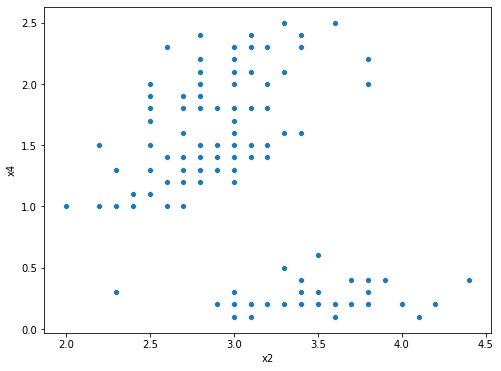

In [7]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='x2', y='x4', data=new_df, ax=ax)

# PCA

## Covarience Matrix

Lets make covariance Matrix

In [8]:
X_new = new_df[['x2', 'x4']].values[:20,:]
X_new.shape

(20, 2)

## Normalize the Values

In [9]:
mean = X_new.mean(axis=0)
std = X_new.std(axis=0)
X_new = (X_new - mean) / (2*std)

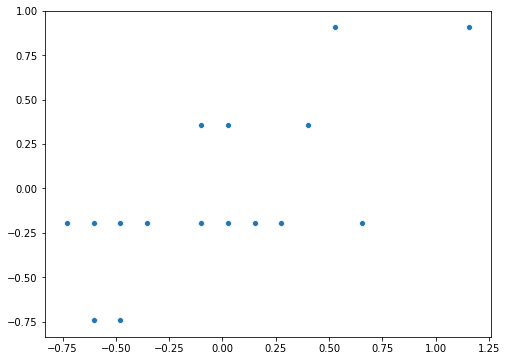

In [10]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x=X_new[:,0], y=X_new[:, 1], ax=ax, hue=None)

In [11]:
cov_mat = X_new.T @ X_new
cov_mat.shape

(2, 2)

## SVD

`U, S, V = np.linalg.svd(cov_mat)`

U: Eigen Vector

S: Eigen Value

In [12]:
U, S, V = np.linalg.svd(cov_mat)

In [13]:
u1 = U[:, 0]
u2 = U[:, 1]

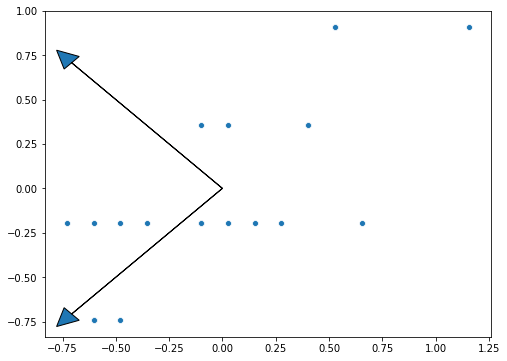

In [14]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x=X_new[:,0], y=X_new[:, 1], ax=ax, hue=None)
ax.arrow(0, 0, u1[0], u1[1], head_length=0.1, head_width=0.1)
ax.arrow(0, 0, u2[0], u2[1], head_length=0.1, head_width=0.1)

## Let's check Variation

\begin{equation}
EigenValue =  \sum_{i=1}^n {d_i^2} 
\end{equation}

\begin{equation}
Singular Value = \sqrt { EigenValue } 
\end{equation}


In [15]:
m ,n = X_new.shape

In [16]:
variation = 1/m*(S)

In [17]:
print('Variation for PC1 is: {}%'.format(variation[0]*100/variation.sum()))
print('Variation for PC2 is: {}%'.format(variation[1]*100/variation.sum()))

Variation for PC1 is: 87.65969518713021%
Variation for PC2 is: 12.34030481286978%


## Another Way for calculating variation

\begin{equation}
EigenValue =  \sum_{i=1}^n {d_i^2} 
\end{equation}

In [35]:
Z1 = X_new @ u1
X_approx1 = np.expand_dims(Z1, axis=-1) @ u1.T[None]
projection_loss1 = np.sum(np.linSalg.norm(X_new - X_approx1, axis=-1))
total_len = np.sum(np.linalg.norm(X_new, axis=-1))

In [36]:
Z2 = X_new @ u2
X_approx2 = np.expand_dims(Z2, axis=-1) @ u2.T[None]
projection_loss2 = np.sum(np.linalg.norm(X_new - X_approx2, axis=-1))

In [39]:
print('Variation for PC1 is: {}%'.format((1- projection_loss1/total_len)*100))
print('Variation for PC2 is: {}%'.format((1- projection_loss2/total_len)*100))

Variation for PC1 is: 66.370755391245%
Variation for PC2 is: 12.643439389133793%


# Reduce to Principal Component

Component 1

In [228]:
Z1 = X_new @ u1

In [229]:
X_approx1 = np.expand_dims(Z1, axis=-1) @ u1.T[None]

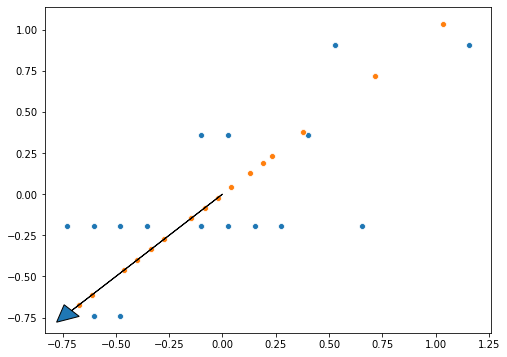

In [230]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x=X_new[:,0], y=X_new[:, 1], ax=ax, hue=None)
ax.arrow(0, 0, u1[0], u1[1], head_length=0.1, head_width=0.1)
sns.scatterplot(x=X_approx1[:,0], y=X_approx1[:, 1], ax=ax, hue=None)

Component 2

In [231]:
Z2 = X_new @ u2

In [232]:
X_approx2 = np.expand_dims(Z2, axis=-1) @ u2.T[None]

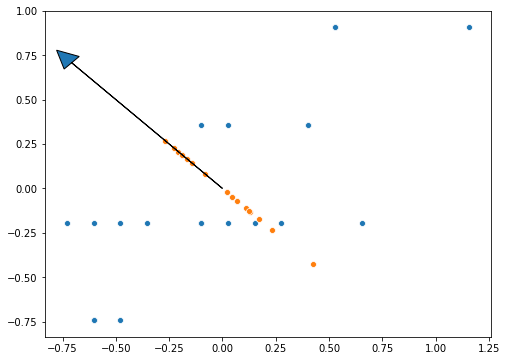

In [233]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x=X_new[:,0], y=X_new[:, 1], ax=ax, hue=None)
ax.arrow(0, 0, u2[0], u2[1], head_length=0.1, head_width=0.1)
sns.scatterplot(x=X_approx2[:,0], y=X_approx2[:, 1], ax=ax, hue=None)

> Clearly PC1 Captures more Variation

# Try with more features

In [57]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / (2*std)

In [58]:
cov_mat = X.T @ X

In [59]:
U, S, V = np.linalg.svd(cov_mat)

In [60]:
for i in range(len(S)):
    print('Variation for PC{} is: {}%'.format(i+1, S[i]*100/S.sum()))

Variation for PC1 is: 72.96244541329987%
Variation for PC2 is: 22.850761786701753%
Variation for PC3 is: 3.668921889282877%
Variation for PC4 is: 0.5178709107154911%


PC1 and PC2 are enough to resent the data.

In [61]:
U_red = U[:, :2]
Z = X @ U_red

In [62]:
X_approx = Z @ U_red.T

In [63]:
Z_df = pd.DataFrame(Z, columns=['z1', 'z2'])

Let's plot the Z(reduced dimensions on graph

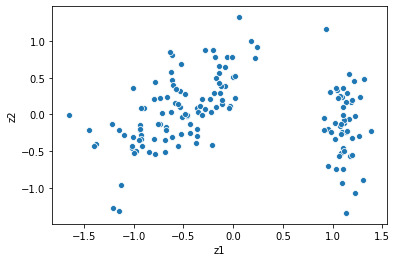

In [64]:
sns.scatterplot(x='z1', y='z2', data=Z_df)